
## Data Import 
#### Since the data that I am working with is rather large and not in csv form I will be taking the top 10000 values or so. If needed I can easily up that in the following code blocks. 

#### The dataset that I choose is stored in a SQLite file which is a file that can have queries applied to it and mostly acts like a full db. For me to grab the data Im going to need to import a sqlite library that does this for me. 

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load connection
conn = sqlite3.connect("WildfireDS.sqlite")

In [2]:
# load the data using a special pandas method made for SqlFiles and tables
fires = pd.read_sql_query('SELECT * FROM Fires', conn)

# take a peek at the data
fires.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


## Clean up Data. 
##### Made this reusable in case I want to bring in more data. This function removes all the columns that we don't care about and is useless to our analysis. 

In [3]:
fires.columns.tolist()

['OBJECTID',
 'FOD_ID',
 'FPA_ID',
 'SOURCE_SYSTEM_TYPE',
 'SOURCE_SYSTEM',
 'NWCG_REPORTING_AGENCY',
 'NWCG_REPORTING_UNIT_ID',
 'NWCG_REPORTING_UNIT_NAME',
 'SOURCE_REPORTING_UNIT',
 'SOURCE_REPORTING_UNIT_NAME',
 'LOCAL_FIRE_REPORT_ID',
 'LOCAL_INCIDENT_ID',
 'FIRE_CODE',
 'FIRE_NAME',
 'ICS_209_INCIDENT_NUMBER',
 'ICS_209_NAME',
 'MTBS_ID',
 'MTBS_FIRE_NAME',
 'COMPLEX_NAME',
 'FIRE_YEAR',
 'DISCOVERY_DATE',
 'DISCOVERY_DOY',
 'DISCOVERY_TIME',
 'STAT_CAUSE_CODE',
 'STAT_CAUSE_DESCR',
 'CONT_DATE',
 'CONT_DOY',
 'CONT_TIME',
 'FIRE_SIZE',
 'FIRE_SIZE_CLASS',
 'LATITUDE',
 'LONGITUDE',
 'OWNER_CODE',
 'OWNER_DESCR',
 'STATE',
 'COUNTY',
 'FIPS_CODE',
 'FIPS_NAME',
 'Shape']

In [4]:
# create function to drop unnecessary columns and clean up the dataframe
def clean_df(data):
    #remove columns with the ID's as well as stuff we don't care about
    data.drop(columns=['SOURCE_SYSTEM_TYPE','LOCAL_FIRE_REPORT_ID','LOCAL_INCIDENT_ID','MTBS_ID','FOD_ID','NWCG_REPORTING_UNIT_ID','ICS_209_INCIDENT_NUMBER','NWCG_REPORTING_AGENCY','SOURCE_REPORTING_UNIT','OWNER_CODE','FPA_ID','NWCG_REPORTING_UNIT_NAME','ICS_209_NAME','MTBS_FIRE_NAME','COMPLEX_NAME','OBJECTID','Shape','STAT_CAUSE_CODE','FIPS_CODE','FIPS_NAME'], inplace=True)

In [8]:
clean_df(fires)

fires.columns.tolist()

['SOURCE_SYSTEM',
 'SOURCE_REPORTING_UNIT_NAME',
 'FIRE_CODE',
 'FIRE_NAME',
 'FIRE_YEAR',
 'DISCOVERY_DATE',
 'DISCOVERY_DOY',
 'DISCOVERY_TIME',
 'STAT_CAUSE_DESCR',
 'CONT_DATE',
 'CONT_DOY',
 'CONT_TIME',
 'FIRE_SIZE',
 'FIRE_SIZE_CLASS',
 'LATITUDE',
 'LONGITUDE',
 'OWNER_DESCR',
 'STATE',
 'COUNTY']

In [18]:
fires.head()

,SOURCE_SYSTEM,SOURCE_REPORTING_UNIT_NAME,FIRE_CODE,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY
0,FS-FIRESTAT,Plumas National Forest,BJ8K,FOUNTAIN,2005,2453403.5,33,1300,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,USFS,CA,63
1,FS-FIRESTAT,Eldorado National Forest,AAC0,PIGEON,2004,2453137.5,133,0845,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,USFS,CA,61
2,FS-FIRESTAT,Eldorado National Forest,A32W,SLACK,2004,2453156.5,152,1921,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17
3,FS-FIRESTAT,Eldorado National Forest,None,DEER,2004,2453184.5,180,1600,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,USFS,CA,3
4,FS-FIRESTAT,Eldorado National Forest,None,STEVENOT,2004,2453184.5,180,1600,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,USFS,CA,3


## Data Exploration 

#### Lets take a look at the data we have and see if we can extract any useful information from it

In [6]:
# display the rows and columns of the data frame.
fires.shape

(1880465, 19)

In [7]:
# First Fire year in the ds
first_fire = fires['FIRE_YEAR'].min()

# Latest Fire year in the ds
latest_fire = fires['FIRE_YEAR'].max()

print('First Fire in ds: {}'.format(first_fire))
print('Latest Fire in ds: {}'.format(latest_fire))

First Fire in ds: 1992
Latest Fire in ds: 2015


In [8]:
fire_years = fires.groupby('FIRE_YEAR')

# display how many fires occurred througout the years.
fire_years.count()['FIRE_NAME']


FIRE_YEAR
1992    20498
1993    18105
1994    23388
1995    27032
1996    35648
1997    27733
1998    30225
1999    35942
2000    48362
2001    49060
2002    42585
2003    33258
2004    30852
2005    26642
2006    33166
2007    32211
2008    27090
2009    45199
2010    43824
2011    72569
2012    55978
2013    50212
2014    52883
2015    60814
Name: FIRE_NAME, dtype: int64

In [9]:
fire_units = fires.groupby(['SOURCE_REPORTING_UNIT_NAME'])['FIRE_NAME']

# how many units are out there looking for fires. 
fire_units.unique().count()

4441

In [10]:
# most fires discovered in one day
fires.groupby(['DISCOVERY_DOY'])['FIRE_NAME'].count().max()

8963

In [11]:
fires.groupby(['STAT_CAUSE_DESCR'])['FIRE_NAME'].count()

STAT_CAUSE_DESCR
Arson                106209
Campfire              51004
Children              31537
Debris Burning       171482
Equipment Use         81278
Fireworks             10214
Lightning            217568
Miscellaneous        161361
Missing/Undefined     48822
Powerline             10854
Railroad               7201
Smoking               23069
Structure              2677
Name: FIRE_NAME, dtype: int64

In [12]:
# here we can get the raw data about all the columns in the dataset
fires.describe()

,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,CONT_DATE,CONT_DOY,FIRE_SIZE,LATITUDE,LONGITUDE
count,1.880465e+06,1.880465e+06,1.880465e+06,9.889340e+05,988934.000000,1.880465e+06,1.880465e+06,1.880465e+06
mean,2.003710e+03,2.453064e+06,1.647191e+02,2.453238e+06,172.656766,7.452016e+01,3.678121e+01,-9.570494e+01
std,6.663099e+00,2.434573e+03,9.003891e+01,2.687548e+03,84.320348,2.497598e+03,6.139031e+00,1.671694e+01
min,1.992000e+03,2.448622e+06,1.000000e+00,2.448622e+06,1.000000,1.000000e-05,1.793972e+01,-1.788026e+02
25%,1.998000e+03,2.451084e+06,8.900000e+01,2.450701e+06,102.000000,1.000000e-01,3.281860e+01,-1.103635e+02
50%,2.004000e+03,2.453178e+06,1.640000e+02,2.453466e+06,181.000000,1.000000e+00,3.545250e+01,-9.204304e+01
75%,2.009000e+03,2.455036e+06,2.300000e+02,2.455754e+06,232.000000,3.300000e+00,4.082720e+01,-8.229760e+01
max,2.015000e+03,2.457388e+06,3.660000e+02,2.457392e+06,366.000000,6.069450e+05,7.033060e+01,-6.525694e+01


## Data Visualization

#### Lets graph some of the interesting data that we've extracted


In [13]:
x_fires = fires['FIRE_YEAR'].unique().tolist()

fire_count = fire_years.count()['FIRE_NAME']

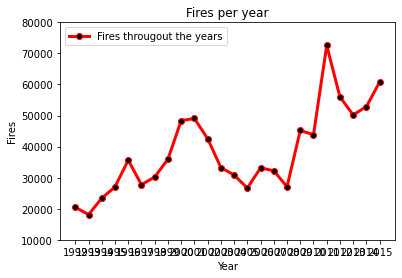

In [14]:
#put your plot here.
plt.plot(fire_count, 'ro-', markerfacecolor='black', lw='3', label='Fires througout the years')
#X label name = Month Number
plt.xlabel('Year')
#Y label name = Sold units number
plt.ylabel('Fires')
#Show legend at the lower right location.
plt.legend(loc='upper left')

plt.title('Fires per year')
plt.xticks(x_fires)
plt.yticks([10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000])
plt.rcParams['figure.figsize'] = (20,15)
plt.show()




In [15]:
fire_causes = fires.groupby(['STAT_CAUSE_DESCR'])['FIRE_NAME'].count().tolist()
fire_causes

cause_list = fires['STAT_CAUSE_DESCR'].unique().tolist()
cause_list.sort()
cause_list

['Arson',
 'Campfire',
 'Children',
 'Debris Burning',
 'Equipment Use',
 'Fireworks',
 'Lightning',
 'Miscellaneous',
 'Missing/Undefined',
 'Powerline',
 'Railroad',
 'Smoking',
 'Structure']

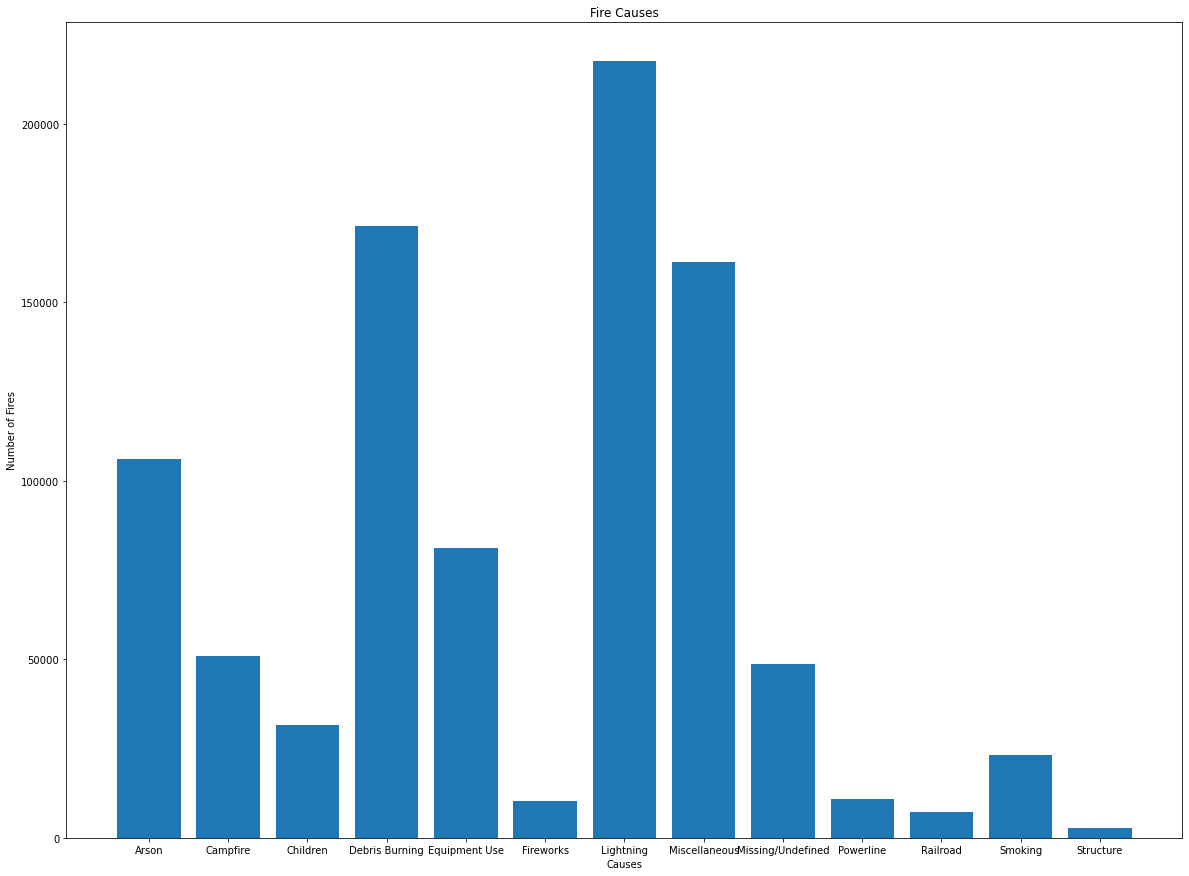

In [16]:
# Set histogram
plt.bar(cause_list,fire_causes)

# Set Title 
plt.title('Fire Causes')

# Set labels 
plt.ylabel('Number of Fires')
plt.xlabel('Causes')

plt.rcParams['figure.figsize'] = (20, 12)

# Display Graph 
plt.show()

## Data Discussion and Findings

### Fire Causes
#### In my hypothesis I predicted that Human would have a large impact on forest fires. 
#### Limiting my data to 50,000 rows we analyze the data and see that 4 of the 5 highest causes for forest fires are man made, but the top cause of fire greatly beats out the next four causes combined. So as humans we have to be more careful about not causing forest fires, but there is no reason to limit the amount of camprires in the forest. 
#### If we load in all 1.8 million rows we can see a much different story. Yes Lightning is still the top cuase of forest fires but, human causes are following behind closely. This shows a very alarming change compared to the last graph. We see that Burning Debris, Arson, and Miscellaneous causes are very close behind. Wildfires can be very dangerous and extremely costly, therefore we should work on limiting the burning of debris or create a safer method that decreases the possability of an uncontainable fire.



### Fire Trends Througout the Years. 

#### In my Proposal I had hypothesized that the number of forest fires had increse with some causes being more people or climate change, but the overall cause of wildfires is not being discussed in this analysis, but rather we will be discussing in more detail the spesific causes of wildfires.

#### Limiting my analysis to only 50,000 entries we see that there is either an error or just a good year for the forest where there are almost no fires from 2001 to 2004, but as soon as 2005 hits we can see a spike that continues to stay at an equaly high level for the next couple years.

#### If we want to take a look at all 1.8 Million entries we see that there is most definetly a trend in the data. There seems to be an upward trend in wildfires as the years go on. Given the limited information we hold we can't determine the direct cause of it all, but we can see that we are costing the states, and federal resources a lot by having them fight the fires. 